In [5]:
import pandas as pd

# Step 2: Load the datase
df = pd.read_csv(r'C:\Users\khush\Downloads\heart_cleveland_upload.csv') 

# Step 3: Show the first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
# Shape of the dataset
print("Shape of data:", df.shape)

# Data types and non-null values
df.info()


Shape of data: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
# Basic statistics of numerical columns
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
# Check for missing values
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [19]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [21]:
df['condition'].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

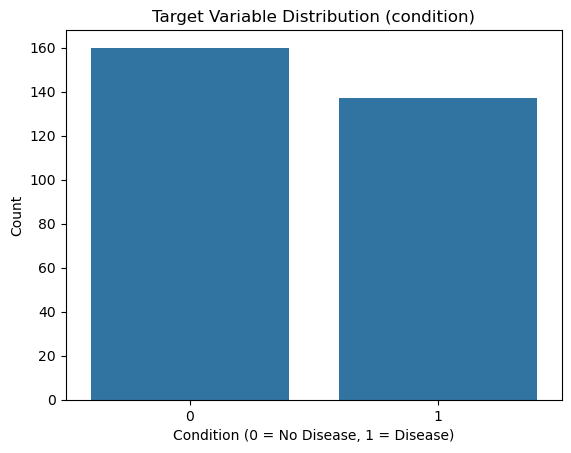

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='condition', data=df)
plt.title('Target Variable Distribution (condition)')
plt.xlabel('Condition (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()


In [25]:
df.rename(columns={'condition': 'target'}, inplace=True)


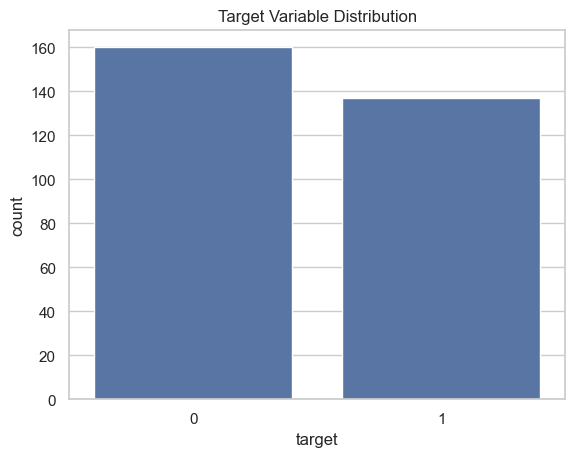

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distribution of target
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()


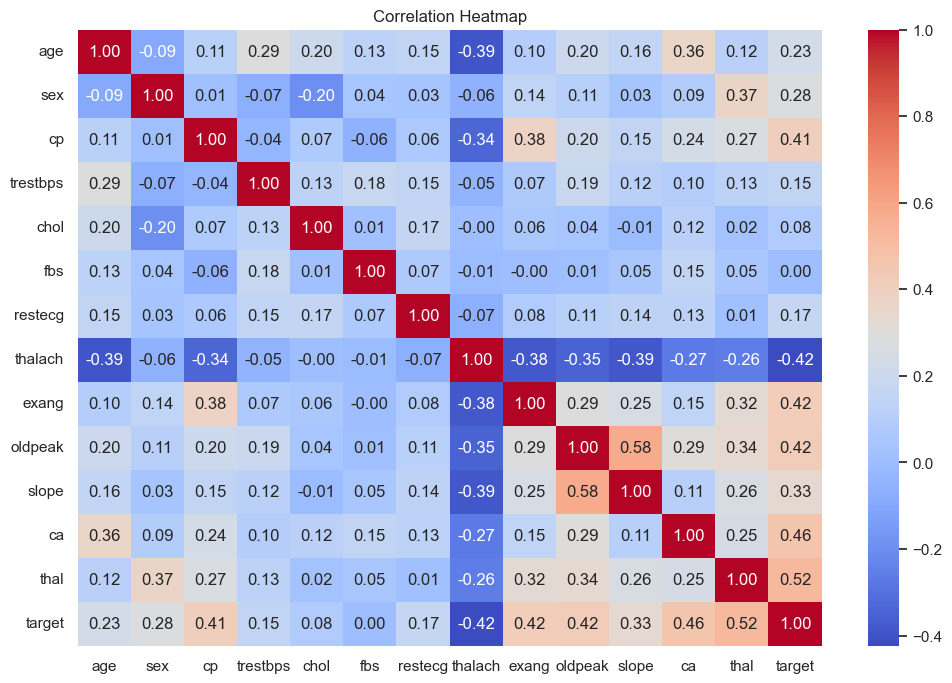

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [31]:
# If not done: rename 'condition' to 'target'
df.rename(columns={'condition': 'target'}, inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)

# Show the new shape
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (297, 18)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,slope_1,slope_2
0,69,1,160,234,1,2,131,0,0.1,1,0,False,False,False,False,False,True,False
1,69,0,140,239,0,0,151,0,1.8,2,0,False,False,False,False,False,False,False
2,66,0,150,226,0,0,114,0,2.6,0,0,False,False,False,False,False,False,True
3,65,1,138,282,1,2,174,0,1.4,1,1,False,False,False,False,False,True,False
4,64,1,110,211,0,2,144,1,1.8,0,0,False,False,False,False,False,True,False


In [33]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 237
Testing samples: 60


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [39]:
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [41]:
log_model = LogisticRegression()
train_and_evaluate(log_model, "Logistic Regression")



Logistic Regression Accuracy: 0.8167
Confusion Matrix:
 [[26  6]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [43]:
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, "K-Nearest Neighbors")



K-Nearest Neighbors Accuracy: 0.7167
Confusion Matrix:
 [[22 10]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.68      0.75      0.71        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [45]:
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate(rf_model, "Random Forest")



Random Forest Accuracy: 0.7500
Confusion Matrix:
 [[24  8]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [47]:
svm_model = SVC()
train_and_evaluate(svm_model, "Support Vector Machine")



Support Vector Machine Accuracy: 0.7167
Confusion Matrix:
 [[20 12]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.66      0.82      0.73        28

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



In [49]:
models = {
    "Logistic Regression": log_model,
    "KNN": knn_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.8167
KNN: 0.7167
Random Forest: 0.7500
SVM: 0.7167


In [59]:
import joblib

# Save model
joblib.dump(log_model, 'models/logistic_model.pkl')

# Save scaler
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [61]:
print(os.listdir('models'))


['logistic_model.pkl', 'scaler.pkl']
